<a href="https://colab.research.google.com/github/abraham35/ML-project-22/blob/main/Online%20Retail%20ML%20Prediction%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
import pandas as pd


In [4]:
uploaded = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [5]:
df = pd.read_excel('Online Retail.xlsx')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [7]:
# Remove rows with missing CustomerID or InvoiceNo
df = df.dropna(subset=['CustomerID', 'InvoiceNo'])

# Fill missing 'Description' with a placeholder or drop the column
df['Description'].fillna('Unknown', inplace=True)

# Handle other missing values (if any), for example, in Quantity or UnitPrice
df.fillna(0, inplace=True)  # or use median for continuous variables like Quantity


<ipython-input-7-2c6f43313b7d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna('Unknown', inplace=True)
<ipython-input-7-2c6f43313b7d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Description'].fillna('Unknown', inplace=True)
<ipython-input-7-2c6f43313b7d>:8: SettingWithCopyWarning: 
A value is trying to be se

In [8]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract useful time-based features
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year


In [9]:
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']


In [10]:
# Label encoding for 'Country'
le = LabelEncoder()
df['CountryEncoded'] = le.fit_transform(df['Country'])


In [11]:
# Define features (X) and target (y)
X = df[['Quantity', 'UnitPrice', 'DayOfWeek', 'Hour', 'Month', 'Year', 'CountryEncoded']]
y = df['TotalSpend']


In [12]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Train the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=1000)
xg_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_xg = xg_reg.predict(X_test)


In [14]:
# Train the Random Forest model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_reg.predict(X_test)


In [15]:
# Evaluate XGBoost
rmse_xg = np.sqrt(mean_squared_error(y_test, y_pred_xg))
mae_xg = mean_absolute_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)

In [16]:
# Evaluate Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [17]:
# Print Evaluation Metrics
print("XGBoost Model:")
print(f"RMSE: {rmse_xg:.2f}, MAE: {mae_xg:.2f}, R2: {r2_xg:.2f}")

XGBoost Model:
RMSE: 345.33, MAE: 15.04, R2: -0.28


In [18]:
print("\nRandom Forest Model:")
print(f"RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}, R2: {r2_rf:.2f}")


Random Forest Model:
RMSE: 122.78, MAE: 0.78, R2: 0.84


In [21]:
# Print the first 10 predictions
print("Predictions (first 10 values):")
print(y_pred_rf[:10])

Predictions (first 10 values):
[ 19.9     17.       7.5624  19.8     12.48    23.4     15.9      5.95
 102.       0.76  ]


In [22]:
# Print the first 10 actual vs predicted values
print("Actual vs Predicted Total Spend (first 10 values):")
for i in range(10):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred_rf[i]}")


Actual vs Predicted Total Spend (first 10 values):
Actual: 19.9, Predicted: 19.900000000000144
Actual: 17.0, Predicted: 17.0
Actual: 7.68, Predicted: 7.562399999999984
Actual: 19.799999999999997, Predicted: 19.80000000000081
Actual: 12.48, Predicted: 12.479999999999983
Actual: 23.4, Predicted: 23.400000000000233
Actual: 15.9, Predicted: 15.90000000000032
Actual: 5.95, Predicted: 5.949999999999955
Actual: 102.0, Predicted: 102.0
Actual: 0.76, Predicted: 0.7600000000000002


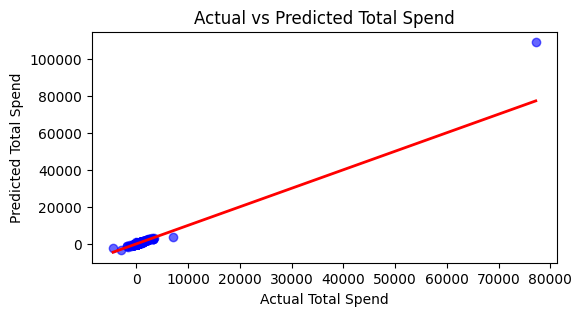

In [24]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred_rf, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Line of perfect prediction
plt.title('Actual vs Predicted Total Spend')
plt.xlabel('Actual Total Spend')
plt.ylabel('Predicted Total Spend')
plt.show()


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R²): {r2_rf:.2f}")


Random Forest Model Performance:
Mean Absolute Error (MAE): 0.78
Root Mean Squared Error (RMSE): 122.78
R-squared (R²): 0.84


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
print(f"Best Parameters: {grid_search.best_params_}")

# Train the model with the best parameters
best_rf_reg = grid_search.best_estimator_

# Make predictions with the best model
y_pred_rf_tuned = best_rf_reg.predict(X_test)

# Evaluate the tuned model
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
print(f"Tuned Model MAE: {mae_rf_tuned:.2f}")
